In [1]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# getting the basic information about the columns and their data-type.
df.info()

# 9 columns with object datatype and 6 columns with numeric datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# checking for any null values column-wise.
df.isnull().sum()

# didn't find any.

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# checking for duplicate entries.
df.duplicated().value_counts()

# Looks like there are some duplicate entries.

False    32536
True        24
dtype: int64

In [6]:
# dropping the duplicate entries.
df.drop_duplicates(inplace=True,ignore_index=True)


In [7]:
# checking the unique values of 'Workclass' column.
df['Workclass'].unique()

# Some entries in the column has values as '?'.

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
# Let's consider the entries with values= '?' as a separate category and rename it as 'Other'.
df['Workclass']= df['Workclass'].replace(" ?","Other")

In [9]:
# checking the unique values of 'Education' column.
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
# checking the unique values of 'Education_num' column.
df['Education_num'].unique()

# The 'Education_num' column has the values in 'Education' column encoded in numeric form.

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [11]:
# checking the unique values of 'Marital_status' column.
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [12]:
# checking the unique values of 'Occupation' column.
df['Occupation'].unique()

# Some entries in the column has values as '?'.

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
# Let's consider the entries with values= '?' as a separate category and rename it as 'Other'.
df['Occupation']= df['Occupation'].replace(" ?","Other")

In [14]:
# checking the unique values of 'Relationship' column.
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [15]:
# checking the unique values of 'Race' column.
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [16]:
# checking the unique values of 'Sex' column.
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [17]:
# checking the unique values of 'Native_country' column.
df['Native_country'].unique()

# Some entries in the column has values as '?'.

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
# Let's consider the entries with values= '?' as a separate category and rename it as 'Other'.
df['Native_country']=df['Native_country'].replace(" ?","Other")

In [19]:
# checking the unique values of 'Income' column.
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


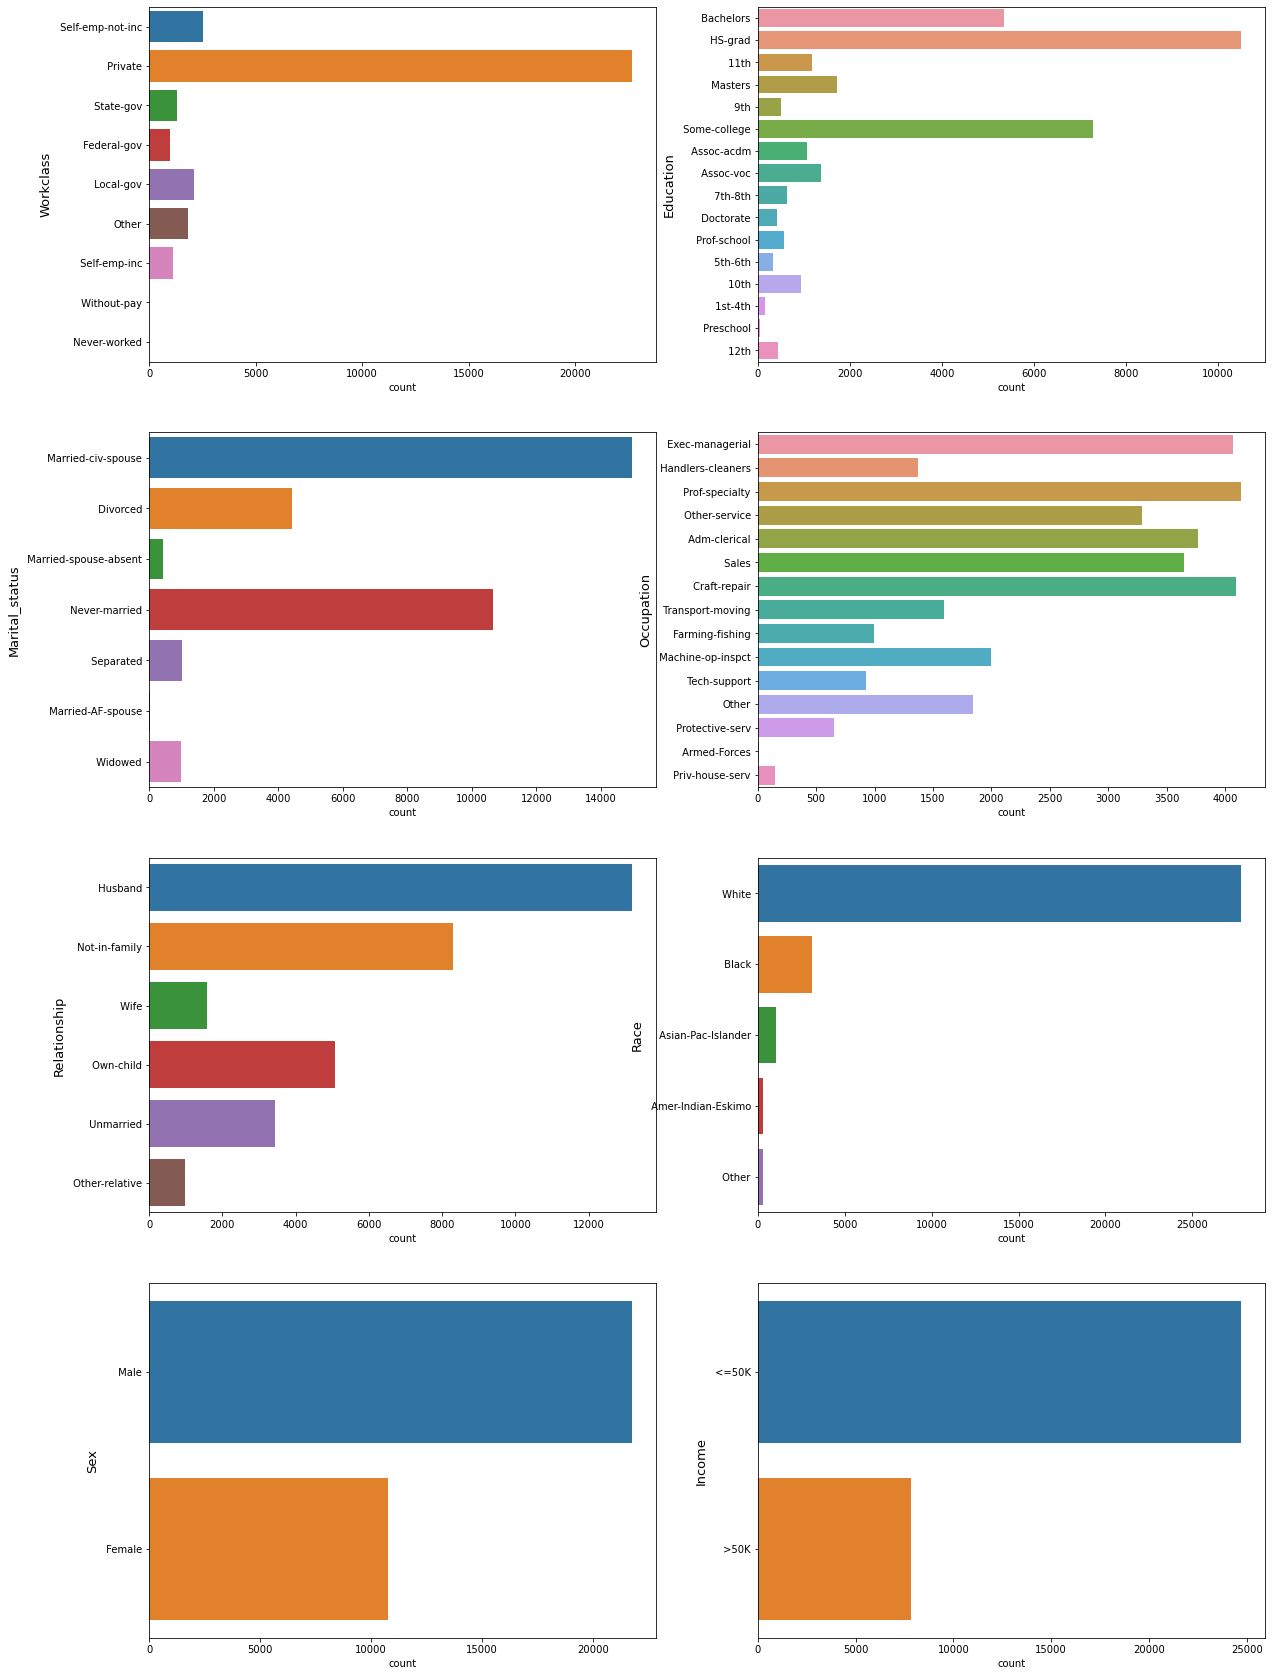

In [21]:
# Let's see the countplot of the categorical columns. 
cat_features=['Workclass', 'Education', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex', 'Income']
plt.figure(figsize=(20,30))
for i in enumerate(cat_features):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(y=i[1],data=df)
    plt.ylabel(i[1],fontsize=13)
    
# Observations:
# 1. A very high majority of people in the dataset works in the 'Private' sector.
# 2. Majority of people are HS-grads.
# 3. People married with civilian spouse and never-married are higher in number.
# 4. A very high majority of people in the dataset are of white race.
# 5. Majority of people are male in this dataset.

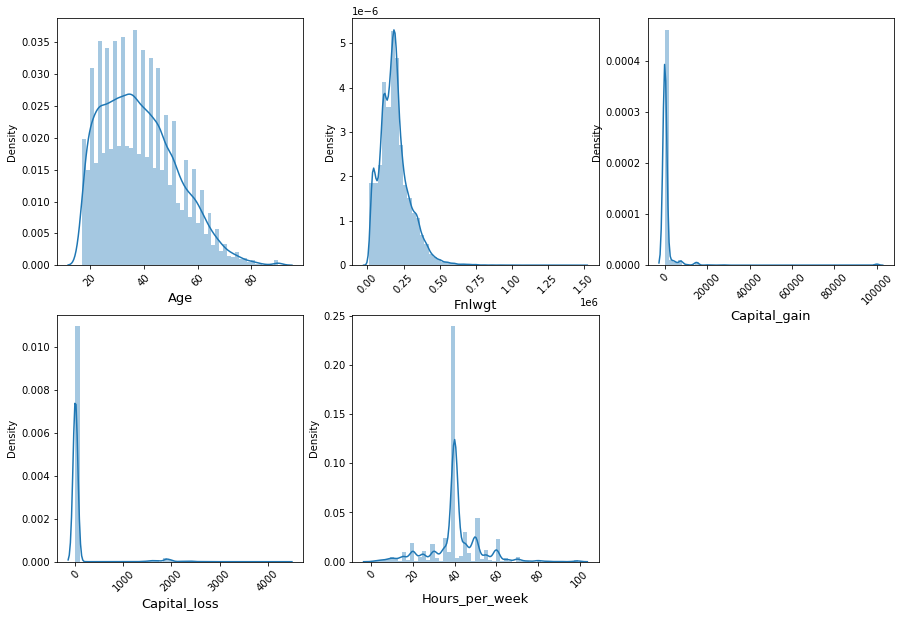

In [22]:
# Let's see the distribution plot of the continuous numeric columns. 
cont_features=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize=(15,10))
for i in enumerate(cont_features):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1],fontsize=13)
    plt.xticks(rotation=45)
    
# Fnlwgt, Capital_gain and Capital_loss are right skewed.

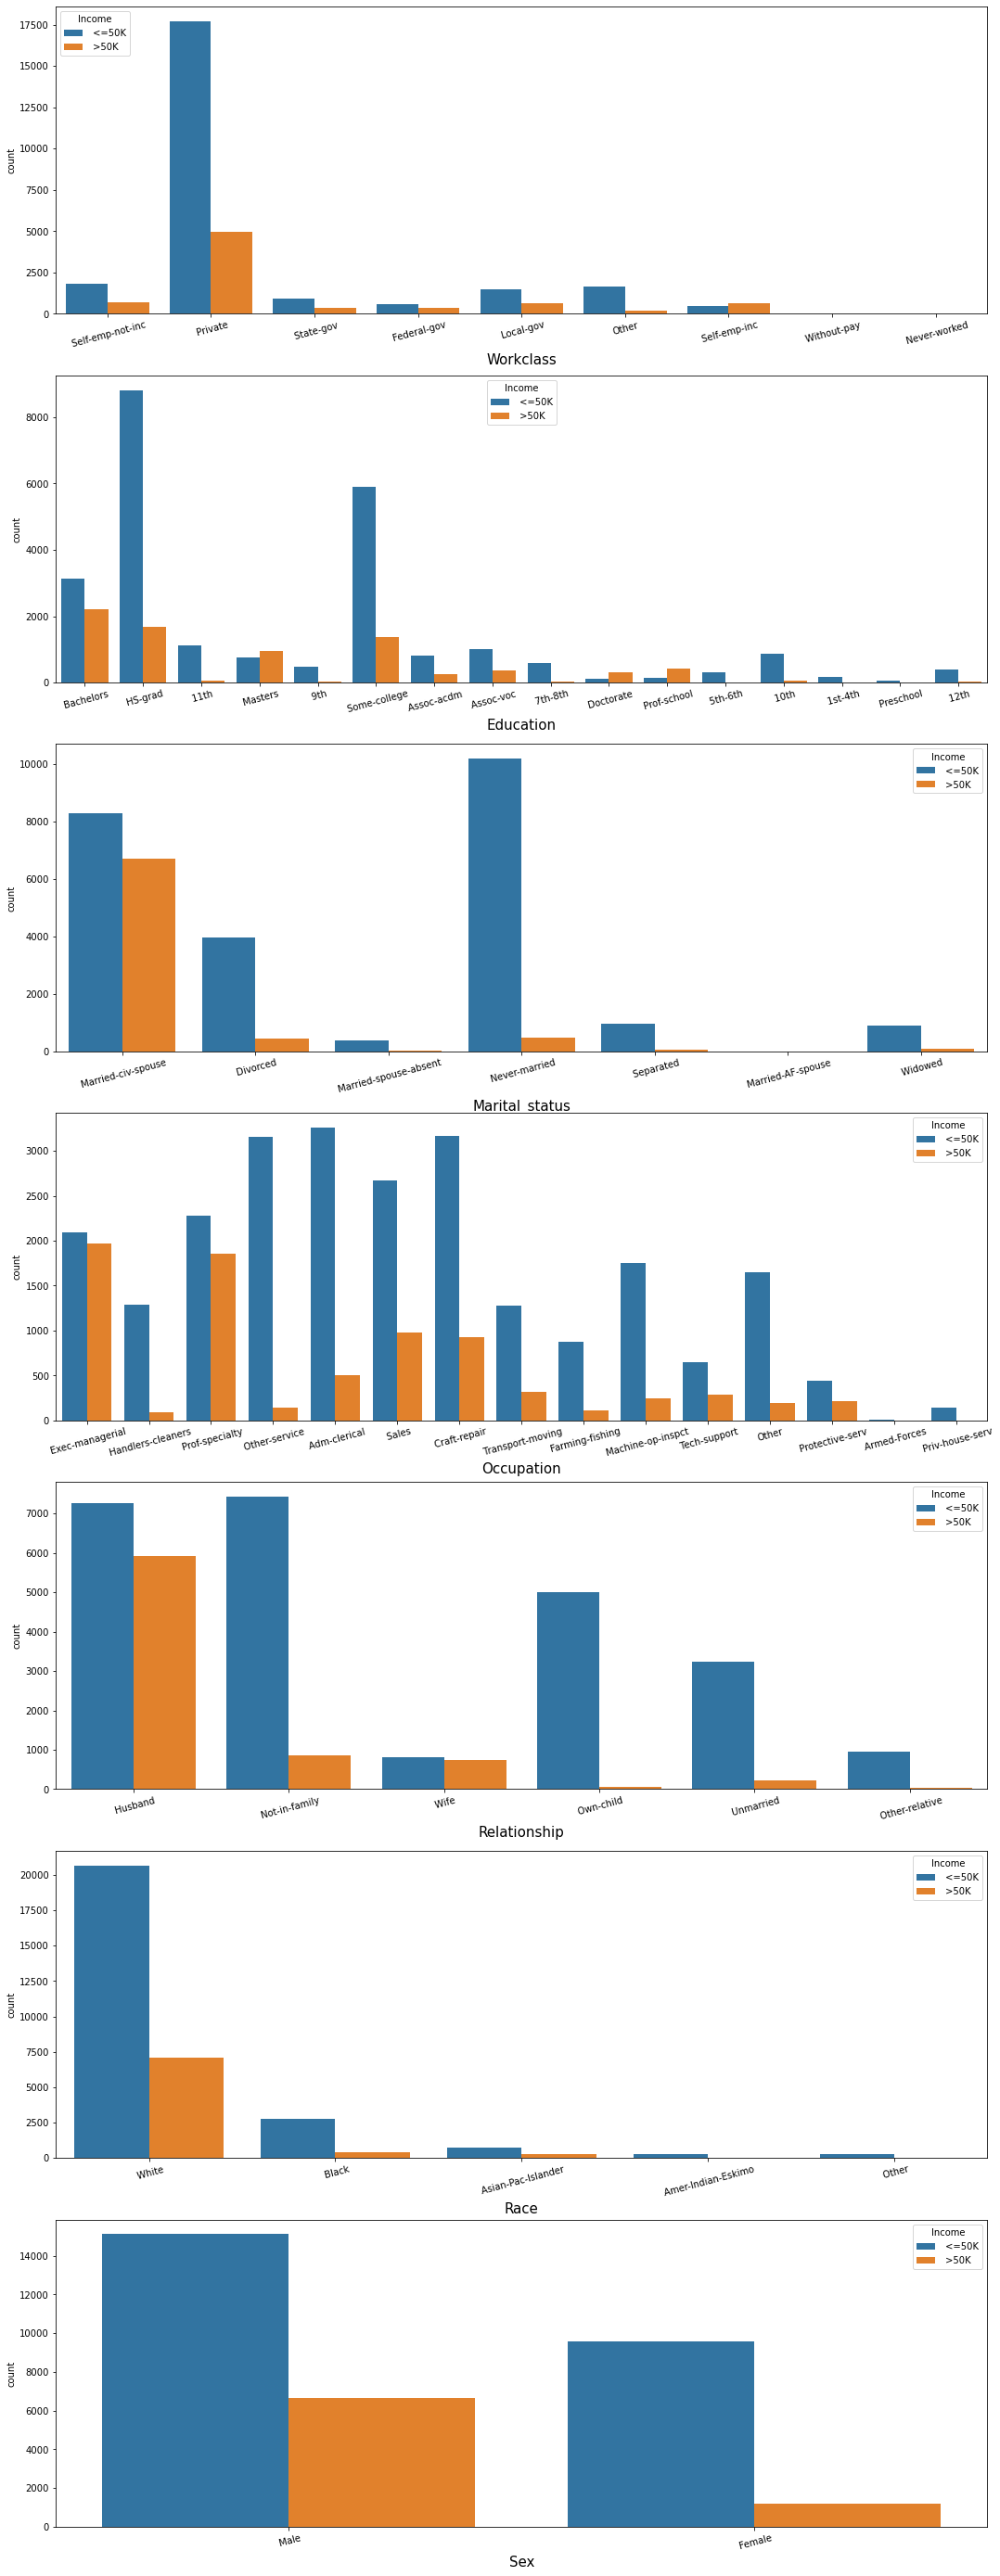

In [23]:
# Let's see the countplot of our categorical features alongwith color encoding of the target variable i.e 'Income'
cat_features=['Workclass', 'Education', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex']
plt.figure(figsize=(18,50))
for i in enumerate(cat_features):
    plt.subplot(7,1,i[0]+1)
    sns.countplot(i[1],hue='Income',data=df)
    plt.xlabel(i[1],fontsize=15)
    plt.xticks(rotation=15)
    
# Observations:
# 1. Pivate sector employees have the highest count of income >50k and also <50k.
# 2. People married with civilian spouse have the highest count in the income category of >50k.
# 3. People who have never married has the highest count in the income category of <50k.

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

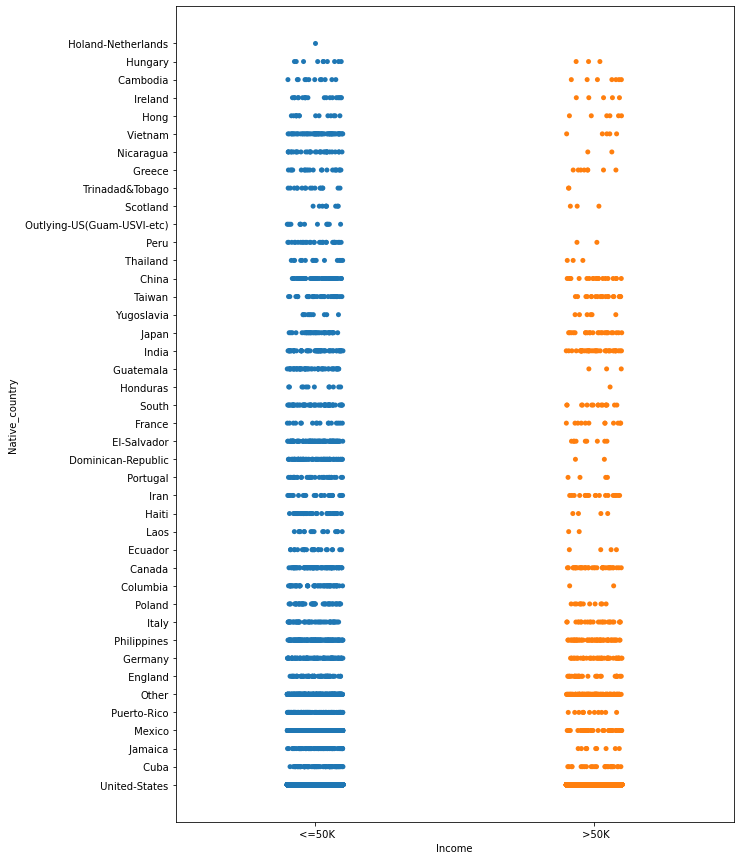

In [24]:
# Let's see the stripplot of 'Native_country' vs 'Income'
plt.figure(figsize=(10,15))
sns.stripplot(x='Income',y='Native_country',data=df)

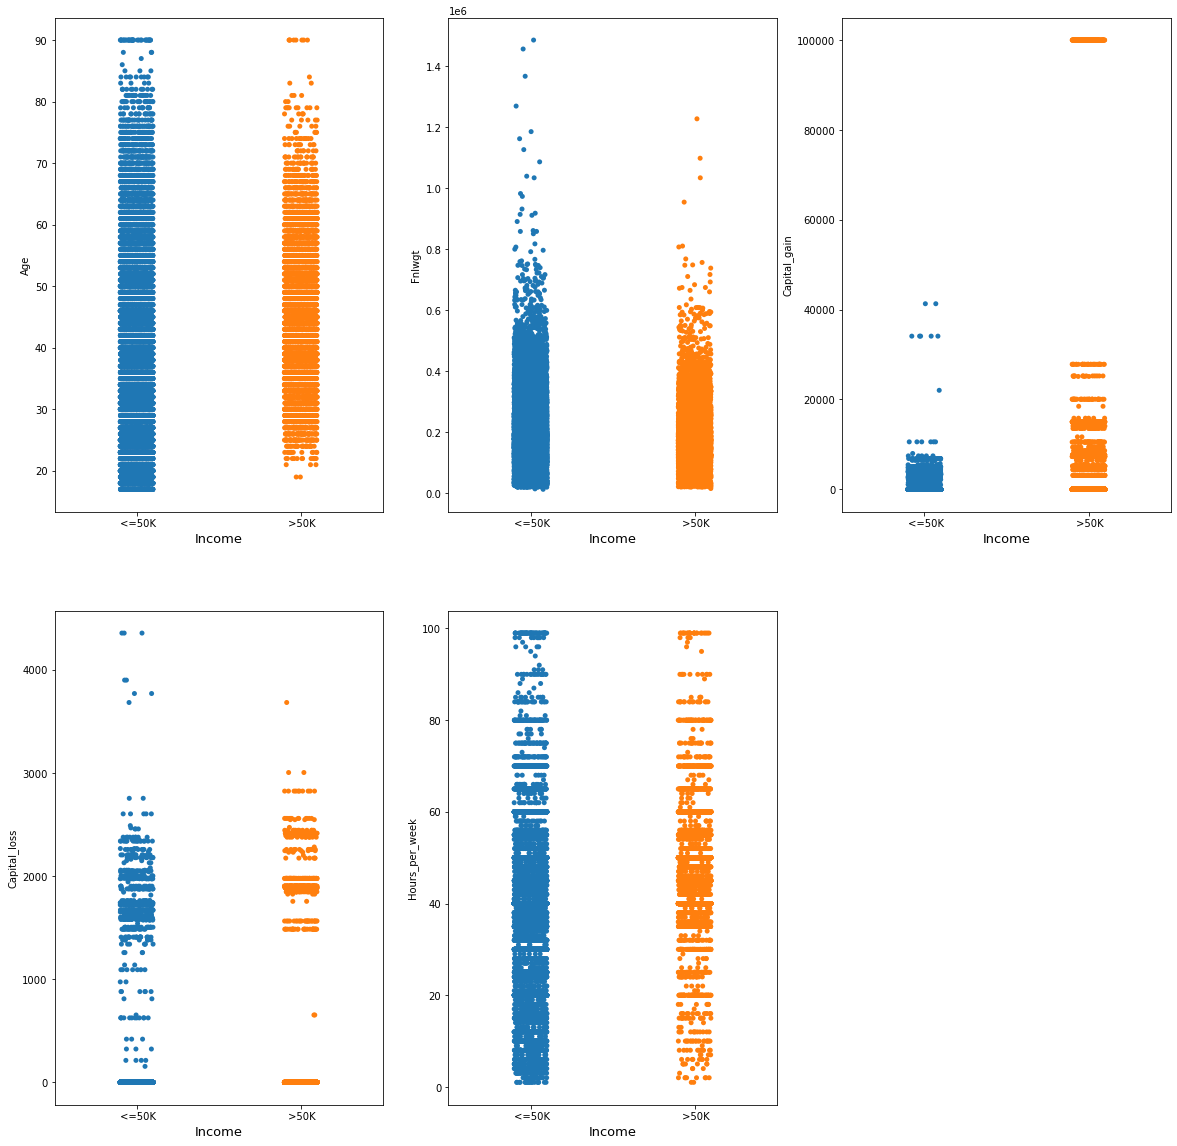

In [25]:
# Let's see the stripplot of our continuous numeric features wrt the target variable i.e 'Income'
cont_features=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize=(20,20))
for i in enumerate(cont_features):
    plt.subplot(2,3,i[0]+1)
    sns.stripplot(x='Income',y=i[1],data=df)
    plt.xlabel('Income',fontsize=13)
    
# Observations:
# 1. People with high capital_gain(>50k) have income always >50k.
# 2. In case of capital_loss it can be seen that although some people had high loss but still have income >50k.

In [26]:
# dropping the 'Education' column as the 'Education_num' column already has the encoded values.
df.drop(columns=['Education'],inplace=True)

In [27]:
# Encoding the categorical object datatype columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])
    
features_enc=df[['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']]
for i in features_enc:
    label_encode(i)
    
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0


<AxesSubplot:>

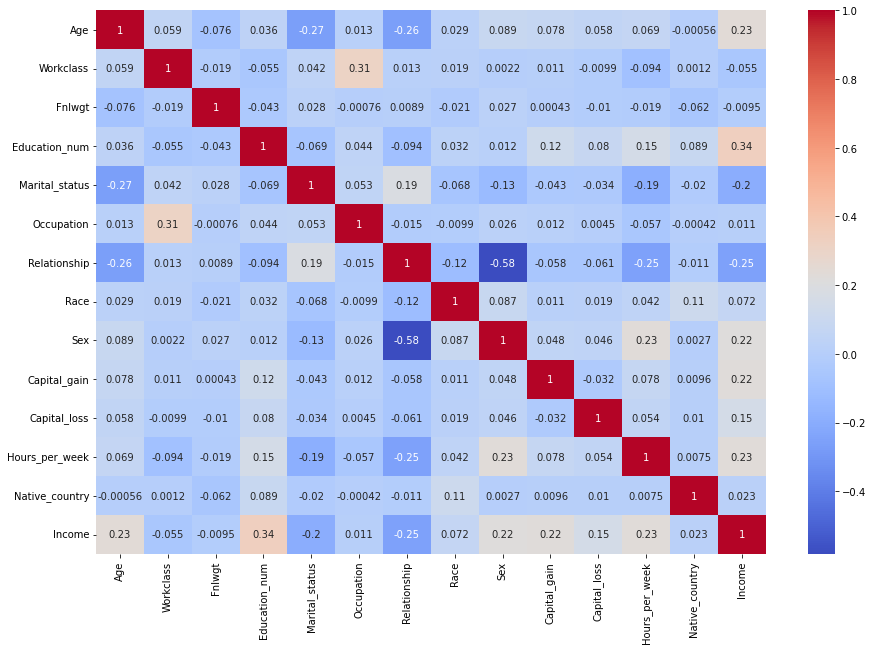

In [28]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# No multicollinearity issues can be seen.

In [29]:
# Let's check the correlation of the target variable with the features.
np.abs(corr["Income"]).sort_values(ascending= False)

# 'Fnlwgt','Occupation'and 'Native_country' have very weak relation with the target variable.

Income            1.000000
Education_num     0.335299
Relationship      0.250955
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Marital_status    0.199187
Capital_loss      0.150498
Race              0.071855
Workclass         0.055154
Native_country    0.022961
Occupation        0.010649
Fnlwgt            0.009521
Name: Income, dtype: float64

In [30]:
# dropping features with very weak relation with target variable.
df.drop(columns=['Fnlwgt','Occupation','Native_country'],inplace=True)

In [31]:
# Let's check for skewness in the continuous numeric columns.
df[['Capital_gain','Capital_loss','Hours_per_week']].skew()

Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

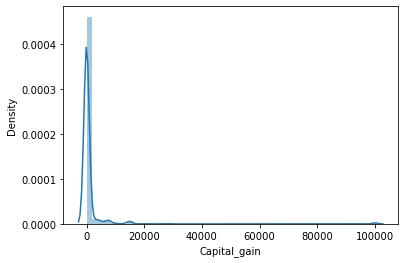

In [32]:
# Let's see the distribution plot of capital gain again.
sns.distplot(df['Capital_gain'])

# The data is highly skewed but we have already seen that the people with high capital_gain have almost always have income>50k.
# We can't lose this information by removal of 'outliers'.

In [33]:
# Applying power transformation to bring down the skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

df['Capital_gain']= pt.fit_transform(df[['Capital_gain']])
df['Capital_loss']= pt.fit_transform(df[['Capital_loss']])

In [34]:
# Separating the features and label.
X= df.drop(columns=['Income'])
y= df['Income']

In [35]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [36]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen as all values are within acceptable range.

        vif        Features
0  1.164965             Age
1  1.018371       Workclass
2  1.051336   Education_num
3  1.127255  Marital_status
4  1.681927    Relationship
5  1.017860            Race
6  1.554763             Sex
7  1.040291    Capital_gain
8  1.018539    Capital_loss
9  1.132749  Hours_per_week


In [37]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
   
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 81.83
Testing Score for sample 0 : 81.17


Training Score for sample 1 : 81.66
Testing Score for sample 1 : 81.99


Training Score for sample 2 : 81.7
Testing Score for sample 2 : 81.62


Training Score for sample 3 : 81.68
Testing Score for sample 3 : 81.72


Training Score for sample 4 : 81.67
Testing Score for sample 4 : 81.23


Training Score for sample 5 : 81.55
Testing Score for sample 5 : 81.71


Training Score for sample 6 : 81.64
Testing Score for sample 6 : 81.71


Training Score for sample 7 : 81.49
Testing Score for sample 7 : 82.44


Training Score for sample 8 : 81.74
Testing Score for sample 8 : 81.42


Training Score for sample 9 : 81.31
Testing Score for sample 9 : 82.54




In [38]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)

    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 95.12
Testing Score for sample 0 : 83.69


Training Score for sample 1 : 95.19
Testing Score for sample 1 : 83.11


Training Score for sample 2 : 95.14
Testing Score for sample 2 : 84.17


Training Score for sample 3 : 95.06
Testing Score for sample 3 : 83.59


Training Score for sample 4 : 95.16
Testing Score for sample 4 : 83.44


Training Score for sample 5 : 95.16
Testing Score for sample 5 : 84.17


Training Score for sample 6 : 95.36
Testing Score for sample 6 : 83.26


Training Score for sample 7 : 95.1
Testing Score for sample 7 : 83.78


Training Score for sample 8 : 95.16
Testing Score for sample 8 : 83.85


Training Score for sample 9 : 95.17
Testing Score for sample 9 : 84.42




In [39]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 86.72
Testing Score for sample 0 : 82.2


Training Score for sample 1 : 87.17
Testing Score for sample 1 : 81.83


Training Score for sample 2 : 86.71
Testing Score for sample 2 : 82.68


Training Score for sample 3 : 86.61
Testing Score for sample 3 : 81.82


Training Score for sample 4 : 86.78
Testing Score for sample 4 : 82.36


Training Score for sample 5 : 86.64
Testing Score for sample 5 : 82.42


Training Score for sample 6 : 87.03
Testing Score for sample 6 : 81.51


Training Score for sample 7 : 86.49
Testing Score for sample 7 : 82.57


Training Score for sample 8 : 86.71
Testing Score for sample 8 : 81.37


Training Score for sample 9 : 86.74
Testing Score for sample 9 : 82.36




In [40]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 84.39
Testing Score for sample 0 : 83.42


Training Score for sample 1 : 84.34
Testing Score for sample 1 : 83.54


Training Score for sample 2 : 84.25
Testing Score for sample 2 : 83.89


Training Score for sample 3 : 84.25
Testing Score for sample 3 : 83.93


Training Score for sample 4 : 84.45
Testing Score for sample 4 : 83.43


Training Score for sample 5 : 84.18
Testing Score for sample 5 : 84.01


Training Score for sample 6 : 84.44
Testing Score for sample 6 : 83.43


Training Score for sample 7 : 84.24
Testing Score for sample 7 : 83.93


Training Score for sample 8 : 84.46
Testing Score for sample 8 : 83.39


Training Score for sample 9 : 84.24
Testing Score for sample 9 : 84.28




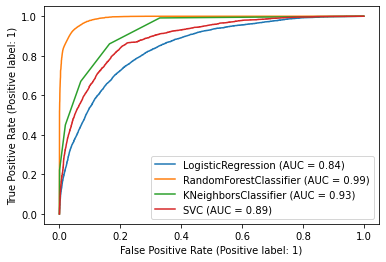

In [41]:
# plotting the roc-auc curves for training data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=9)

disp_train= plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rf,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(knn,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(svc,x_train,y_train, ax=disp_train.ax_)
plt.show()

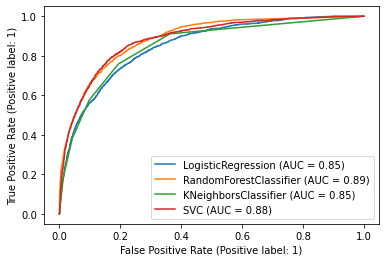

In [42]:
# plotting the roc-auc curves for testing data.
disp_test= plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(knn,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp_test.ax_)
plt.show()

In [43]:
# cross-validating the logistic regression model.
for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 81.59
the cv score for 6 fold: 81.62
the cv score for 7 fold: 81.63
the cv score for 8 fold: 81.62
the cv score for 9 fold: 81.64


In [44]:
# cross-validating the random-forests model.
for i in range(5,10):
    cv_score= cross_val_score(rf,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 83.68
the cv score for 6 fold: 83.67
the cv score for 7 fold: 83.83
the cv score for 8 fold: 83.75
the cv score for 9 fold: 83.8


In [45]:
# cross-validating the KNN model.
for i in range(5,10):
    cv_score= cross_val_score(knn,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 81.84
the cv score for 6 fold: 81.92
the cv score for 7 fold: 82.04
the cv score for 8 fold: 82.03
the cv score for 9 fold: 81.97


In [46]:
# cross-validating the SVC model.
for i in range(5,10):
    cv_score= cross_val_score(svc,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 83.8
the cv score for 6 fold: 83.77
the cv score for 7 fold: 83.77
the cv score for 8 fold: 83.75
the cv score for 9 fold: 83.77


In [ ]:
# Based on the auc-roc curves, Random-Forests CLassifier is working best on our dataset as it has the highest AUC.
# So, let's move ahead with it and try to tune it further.

In [119]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"n_estimators": [100,250,500,1000],
         "criterion":['gini', 'entropy'],
         "max_depth":[10,12,15,17],
         "min_samples_split": range(2,4)        
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}


In [48]:
# Taking the best sample split result and applying on the tuned Random Forests model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=9,stratify=y)
rf_tuned = RandomForestClassifier(n_jobs=-1,criterion='entropy',max_depth=15,min_samples_split=3,n_estimators=250)
rf_tuned.fit(x_train, y_train)
    
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score: 88.97
Testing Score: 86.51 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6174
           1       0.78      0.62      0.69      1960

    accuracy                           0.87      8134
   macro avg       0.83      0.78      0.80      8134
weighted avg       0.86      0.87      0.86      8134

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[5824  350]
 [ 747 1213]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 85.54
the cv score for 6 fold: 85.73
the cv score for 7 fold: 85.59
the cv score for 8 fold: 85.67
the cv score for 9 fold: 85.6


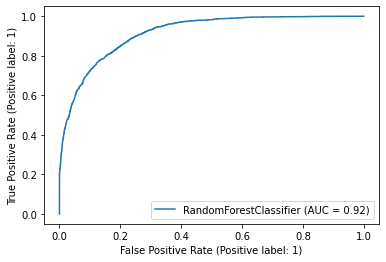

In [49]:
# plotting the roc-auc curve for tuned random forests model on testing data.
plot_roc_curve(rf_tuned,x_test,y_test)

In [50]:
# saving the model using pickle
import pickle 

Census_Income= "Census_Income_model.pickle"
pickle.dump(rf_tuned, open(Census_Income,'wb'))